**Kaggle：TMDB电影票房预测**

如今，电影行业的估值已超过500亿美元。电影比以往任何时候都更受欢迎。那么，影响电影票房的因素有哪些呢？我们的常识可能会给我们提供一些推断：导演、演员、预算、预告片。
那是否是这些因素决定了一部电影的最终票房呢？我们可以分析Kaggle提供的数据来回答这一问题。数据详情可以参考Kaggle官方页面，其主要是电影数据库中的7000多部过去电影的元数据。提供的数据信息包括演员、工作人员、情节关键词、预算、海报、发布日期、语言、制作公司和国家等。本次的目的则是根据提供的这些信息来预测一部电影最终的票房。

**平台与数据集的准备工作**

导入必要的库。同时，忽略警告以使数据探索过程更整洁美观。

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")

从本地向Google Colab导入数据集文件。在本项目中，即为：train.csv。数据集文件夹中仅有tran.csv有标签；而test.csv无标签；sample_submission.csv为Kaggle竞赛的提交示例。

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


在导入train.csv至Google Drive后，在Notebook中读入数据集，并命名为train。

In [ ]:
#Load in the data
train = pd.read_csv("train.csv")

测试数据集从Google Drive导出至本地的功能。

In [ ]:
train.to_csv("./data.csv", index=False, encoding="utf-8-sig")
#保存文件
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
# Create & upload a text file.
#你想要导出的文件的名字
uploaded = drive.CreateFile({'title': 'data.csv'})
#改为之前生成文件的名字
uploaded.SetContentFile('data.csv')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1R6wVYvsPOsPiqjsgyT6bsjf6jRXb8XFY


**探索性数据分析**

先观察数据集的前5行。注意到：数据总共含有23列，最后一列revenue为票房。

In [ ]:
train.head()

id                              belongs_to_collection    budget  \
0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
1   2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   
2   3                                                NaN   3300000   
3   4                                                NaN   1200000   
4   5                                                NaN         0   

                                              genres  \
0                     [{'id': 35, 'name': 'Comedy'}]   
1  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
2                      [{'id': 18, 'name': 'Drama'}]   
3  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
4  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   

                            homepage    imdb_id original_language  \
0                                NaN  tt2637294                en   
1                                NaN  tt0368933                en   
2  http://sonyclassics.com/whiplash/  tt2582802                en   
3         http://kahaanithefilm.com/  tt1821480                hi   
4                                NaN  tt1380152                ko   

                             original_title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                      마린보이   

                                            overview  popularity  ...  \
0  When Lou, who has become the "father of the In...    6.575393  ...   
1  Mia Thermopolis is now a college graduate and ...    8.248895  ...   
2  Under the direction of a ruthless instructor, ...   64.299990  ...   
3  Vidya Bagchi (Vidya Balan) arrives in Kolkata ...    3.174936  ...   
4  Marine Boy is the story of a former national s...    1.148070  ...   

  release_date runtime                                   spoken_languages  \
0      2/20/15    93.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1       8/6/04   113.0           [{'iso_639_1': 'en', 'name': 'English'}]   
2     10/10/14   105.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3       3/9/12   122.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
4       2/5/09   118.0           [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]   

     status                                            tagline  \
0  Released  The Laws of Space and Time are About to be Vio...   
1  Released  It can take a lifetime to find true love; she'...   
2  Released    The road to greatness can take you to the edge.   
3  Released                                                NaN   
4  Released                                                NaN   

                                      title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                Marine Boy   

                                            Keywords  \
0  [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
1  [{'id': 2505, 'name': 'coronation'}, {'id': 42...   
2  [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...   
3  [{'id': 10092, 'name': 'mystery'}, {'id': 1054...   
4                                                NaN   

                                                cast  \
0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...   
1  [{'cast_id': 1, 'character': 'Mia Thermopolis'...   
2  [{'cast_id': 5, 'character': 'Andrew Neimann',...   
3  [{'cast_id': 1, 'character': 'Vidya Bagchi', '...   
4  [{'cast_id': 3, 'character': 'Chun-soo', 'cred...   

                                                crew   revenue  
0  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  12314651  
1  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  95149435  
2  [{'credit_id': '54d5356ec3a3683ba0000039', 'de...  13092000  
3  [{'credit_id': '52fe48779251

现在查看数据的形状。可以看到数据总共含有3000份。然后，查看数据的基本信息。

In [ ]:
train.shape

(3000, 23)

之后查看数据集的基本信息。

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [ ]:
train.describe()

id        budget   popularity      runtime       revenue
count  3000.000000  3.000000e+03  3000.000000  2998.000000  3.000000e+03
mean   1500.500000  2.253133e+07     8.463274   107.856571  6.672585e+07
std     866.169729  3.702609e+07    12.104000    22.086434  1.375323e+08
min       1.000000  0.000000e+00     0.000001     0.000000  1.000000e+00
25%     750.750000  0.000000e+00     4.018053    94.000000  2.379808e+06
50%    1500.500000  8.000000e+06     7.374861   104.000000  1.680707e+07
75%    2250.250000  2.900000e+07    10.890983   118.000000  6.891920e+07
max    3000.000000  3.800000e+08   294.337037   338.000000  1.519558e+09

查看数据集中字符串型特征的描述。

In [ ]:
train.describe(include=['O'])

belongs_to_collection  \
count                                                 604   
unique                                                422   
top     [{'id': 645, 'name': 'James Bond Collection', ...   
freq                                                   16   

                               genres                           homepage  \
count                            2993                                946   
unique                            872                                941   
top     [{'id': 18, 'name': 'Drama'}]  http://www.transformersmovie.com/   
freq                              266                                  4   

          imdb_id original_language original_title  \
count        3000              3000           3000   
unique       3000                36           2975   
top     tt2637294                en         Joshua   
freq            1              2575              2   

                                                 overview  \
count                                                2992   
unique                                               2992   
top     When Lou, who has become the "father of the In...   
freq                                                    1   

                             poster_path  \
count                               2999   
unique                              2999   
top     /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg   
freq                                   1   

                             production_companies  \
count                                        2844   
unique                                       2383   
top     [{'name': 'Paramount Pictures', 'id': 4}]   
freq                                           51   

                                     production_countries release_date  \
count                                                2945         3000   
unique                                                321         2398   
top     [{'iso_3166_1': 'US', 'name': 'United States o...      9/10/10   
freq                                                 1752            5   

                                spoken_languages    status  \
count                                       2980      3000   
unique                                       401         2   
top     [{'iso_639_1': 'en', 'name': 'English'}]  Released   
freq                                        1817      2996   

                       tagline                  title  \
count                     2403                   3000   
unique                    2400                   2969   
top     Based on a true story.  The Magnificent Seven   
freq                         3                      2   

                                           Keywords  cast  \
count                                          2724  2987   
unique                                         2648  2975   
top     [{'id': 10183, 'name': 'independent film'}]    []   
freq                                             27    13   

                                                     crew  
count                                                2984  
unique                                               2984  
top     [{'credit_id': '59ac067c92514107af02c8c8', 'de...  
freq                                                    1

先来观察票房前10的电影的基本情况。可以看到，票房最高的是《The Avengers》，也就是我们常说的《复仇者联盟》。其次是《Furious 7》，即《速度与激情7》。第三是《Avengers: Age of Ultron》，即《复仇者联盟：奥创纪元》。

In [ ]:
train.sort_values(by='revenue', ascending=False).head(10)[['title', 'revenue', 'release_date']]

title     revenue release_date
1126                                 The Avengers  1519557910      4/25/12
1761                                    Furious 7  1506249360       4/1/15
2770                      Avengers: Age of Ultron  1405403694      4/22/15
684                          Beauty and the Beast  1262886337      3/16/17
2322               Transformers: Dark of the Moon  1123746996      6/28/11
906                         The Dark Knight Rises  1084939099      7/16/12
2135  Pirates of the Caribbean: On Stranger Tides  1045713802      5/14/11
2562                                 Finding Dory  1028570889      6/16/16
881                           Alice in Wonderland  1025491110       3/3/10
734                                      Zootopia  1023784195      2/11/16

简写train为df。

In [ ]:
df = train

**数据预处理**

数据预处理主要对数据进行清洗，填充缺失值等操作。

**上映时间**

在数据集中，其中有一列为 release_date，即电影的上映时间，我们先来对该列进行处理。在处理时，将电影上的年、月、日这些信息分开，以便后续的分析。

In [ ]:
def date_features(df):
    df['release_date'] = pd.to_datetime(df['release_date'])  # 转换为时间戳
    df['release_year'] = df['release_date'].dt.year  # 提取年
    df['release_month'] = df['release_date'].dt.month     # 提取月
    df['release_day'] = df['release_date'].dt.day  # 提取日
    df['release_quarter'] = df['release_date'].dt.quarter  # 提取季度
    return df


df = date_features(df)
df['release_year'].head()

0    2015
1    2004
2    2014
3    2012
4    2009
Name: release_year, dtype: int64

查看一下数据是否存在异常值，即电影上映时间超过2019年，因为收集的数据是2019年之前的，所以不可能存在2019年之后上映的电影。因此将这些2019年之后上映的电影视为异常值。

In [ ]:
import numpy as np
# 查看大于 2019 的数据
df['release_year'].iloc[np.where(df['release_year'] > 2019)][:10]

39     2065
41     2067
51     2065
61     2056
68     2062
109    2066
140    2068
144    2067
172    2066
187    2028
Name: release_year, dtype: int64

从上面的结果可以看出，的确存在不少异常值，现在对这些值进行处理。

In [ ]:
# 大于 2019 的减去 100
df['release_year'] = np.where(
    df['release_year'] > 2019, df['release_year']-100, df['release_year'])
df['release_year'].iloc[np.where(df['release_year'] > 2019)][:10]

Series([], Name: release_year, dtype: int64)

处理完成之后，可以看到，已经不存在异常值。

现在查看一下关于日期的数据是否存在缺失值。

In [ ]:
cols = ['release_year', 'release_month', 'release_day']
df[cols].isnull().sum()

release_year     0
release_month    0
release_day      0
dtype: int64

从上面的结果可以看到，关于电影上映日期的数据不存在缺失值。

现在查看一下，每个月的平均电影票房。

Text(0, 0.5, 'Revenue (100 million dollars)')

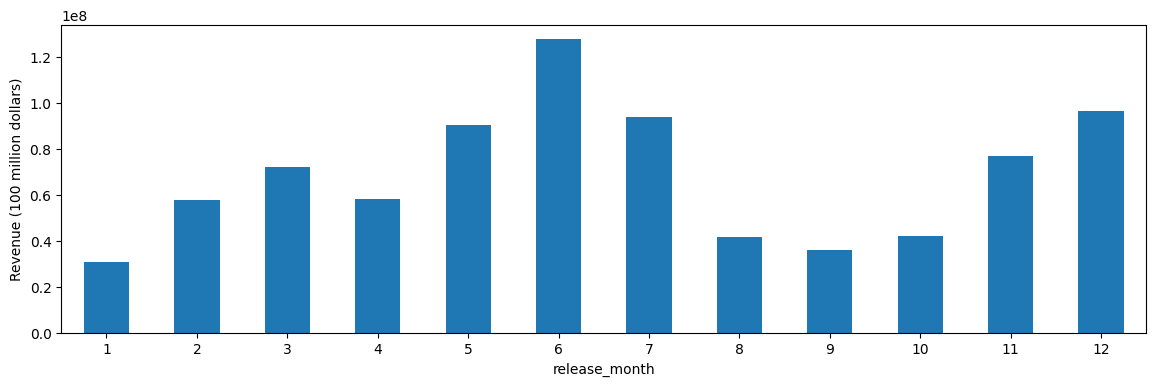

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(14, 4))

df.groupby('release_month').agg('mean')['revenue'].plot(kind='bar', rot=0)
plt.ylabel('Revenue (100 million dollars)')

从上图可以看到，电影的上映时间主要集中在 6 月和 12 月。这可能的原因是这两段时间都是假期，因此很多同学有更多的时间去电影院看电影。所以这两段时间的电影票房要高一点。

接下来再来看每年的电影平均票房数。

Text(0.5, 1.0, 'Mean revenue Over Years')

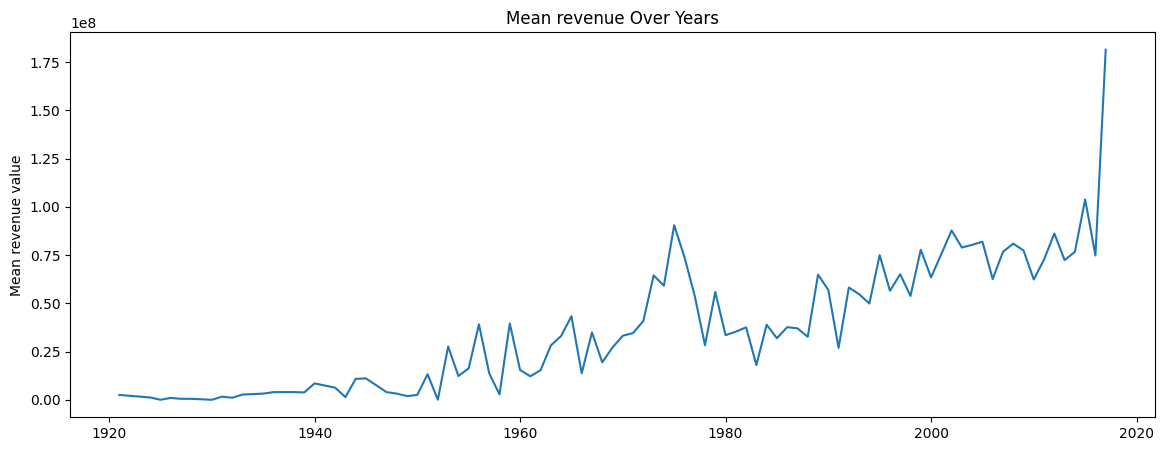

In [ ]:
release_year_mean_data = df.groupby(['release_year'])['revenue'].mean()
fig = plt.figure(figsize=(14, 5))  # 设置画布大小
plt.plot(release_year_mean_data)
plt.ylabel('Mean revenue value')  # 设置 y 轴的标签
plt.title('Mean revenue Over Years')  # 设置标题

从上图可以看到，电影的每年平均票房都是逐年递增的，这可能跟我们的经济增长有关，因为人们越来越有钱了，花费在精神上的消费比例也越来越大了。

接下来看电影的时长跟年份的关系。

Text(0.5, 1.0, 'Mean popularity Over Years')

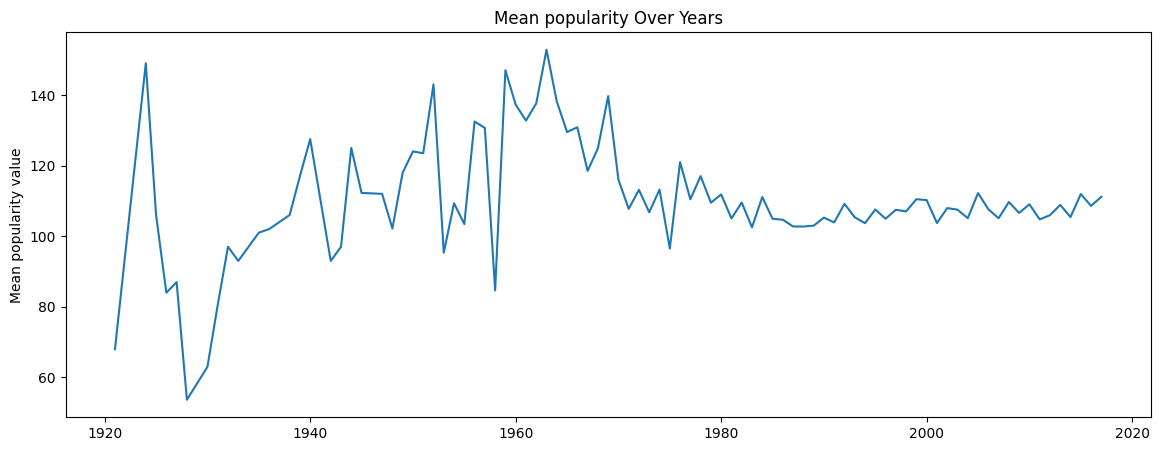

In [ ]:
release_year_mean_data = df.groupby(['release_year'])['runtime'].mean()
fig = plt.figure(figsize=(14, 5))  # 设置画布大小
plt.plot(release_year_mean_data)
plt.ylabel('Mean popularity value')  # 设置 y 轴的标签
plt.title('Mean popularity Over Years')  # 设置标题

从上图中可以发现，在 1980 年之前，电影的平均时长都是不定的，而 1980 年之后，趋向于稳定，差不多是 100 多分钟。

**系列（collection）**

现在来看belongs_to_collection列，先打印该列的前5个数据来进行观察。

In [ ]:
for i, e in enumerate(df['belongs_to_collection'][:5]):
    print(i, e)
    print(type(e))

0 [{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]
<class 'str'>
1 [{'id': 107674, 'name': 'The Princess Diaries Collection', 'poster_path': '/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg', 'backdrop_path': '/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg'}]
<class 'str'>
2 nan
<class 'float'>
3 nan
<class 'float'>
4 nan
<class 'float'>


从上面的结果可以看到，该列主要包括名字、海报等信息。同时还可以看到，存在许多值为nan，也就是缺失值。现在统计一下存在多少个缺失值。这里需要注意的是通过判断该列的值是否是字符串来判断是否存在值或为空值。

In [ ]:
df['belongs_to_collection'].apply(
    lambda x: 1 if type(x) == str else 0).value_counts()

0    2396
1     604
Name: belongs_to_collection, dtype: int64

从上面的结果看出，在3000份数据中，该列的缺失值就有2396。我们从该列中提取name属性。且创建一列保存是否缺失。

In [ ]:
df['collection_name'] = df['belongs_to_collection'].apply(
    lambda x: eval(x)[0]['name'] if type(x) == str else 0)
df['has_collection'] = df['belongs_to_collection'].apply(
    lambda x: 1 if type(x) == str else 0)
df[['collection_name', 'has_collection']].head()

collection_name  has_collection
0  Hot Tub Time Machine Collection               1
1  The Princess Diaries Collection               1
2                                0               0
3                                0               0
4                                0               0

**电影类型**

同样的方法，把 genres 列也处理一下。

In [ ]:
for i, e in enumerate(df['genres'][:5]):
    print(i, e)

0 [{'id': 35, 'name': 'Comedy'}]
1 [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
2 [{'id': 18, 'name': 'Drama'}]
3 [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]
4 [{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]


从上可以看出，genres列主要用来存放电影的类型，例如：喜剧、剧情等。我们可以统计每中类型的电影数量，先统计每部电影都含哪些类别。

In [ ]:
list_of_genres = list(df['genres'].apply(lambda x: [i['name']
                                                    for i in eval(x)] if type(x) == str else []).values)
list_of_genres[:5]

[['Comedy'],
 ['Comedy', 'Drama', 'Family', 'Romance'],
 ['Drama'],
 ['Thriller', 'Drama'],
 ['Action', 'Thriller']]

计算每种电影类型出现的数量。

In [ ]:
from collections import Counter

most_common_genres = Counter(
    [i for j in list_of_genres for i in j]).most_common()
most_common_genres

[('Drama', 1531),
 ('Comedy', 1028),
 ('Thriller', 789),
 ('Action', 741),
 ('Romance', 571),
 ('Crime', 469),
 ('Adventure', 439),
 ('Horror', 301),
 ('Science Fiction', 290),
 ('Family', 260),
 ('Fantasy', 232),
 ('Mystery', 225),
 ('Animation', 141),
 ('History', 132),
 ('Music', 100),
 ('War', 100),
 ('Documentary', 87),
 ('Western', 43),
 ('Foreign', 31),
 ('TV Movie', 1)]

绘制出图形。

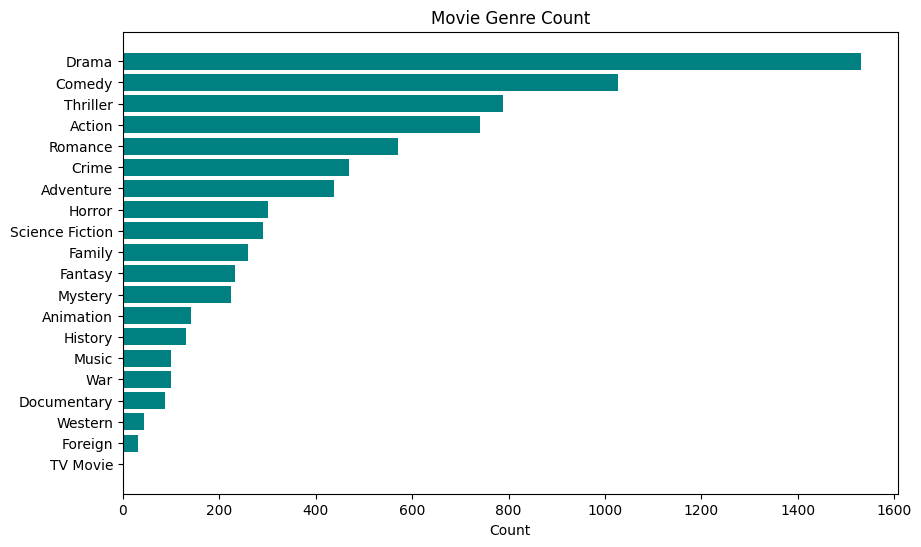

In [ ]:
fig = plt.figure(figsize=(10, 6))
data = dict(most_common_genres)
names = list(data.keys())
values = list(data.values())

plt.barh(sorted(range(len(data)), reverse=True),
         values, tick_label=names, color='teal')
plt.xlabel('Count')
plt.title('Movie Genre Count')
plt.show()

从上图可知，电影数量最多的题材为剧情（Drama），其次是喜剧（Comedy）。我们还可以使用词图的方法来直观的画出。先安装词云库wordcloud。

In [ ]:
!pip install wordcloud

画出词云图。

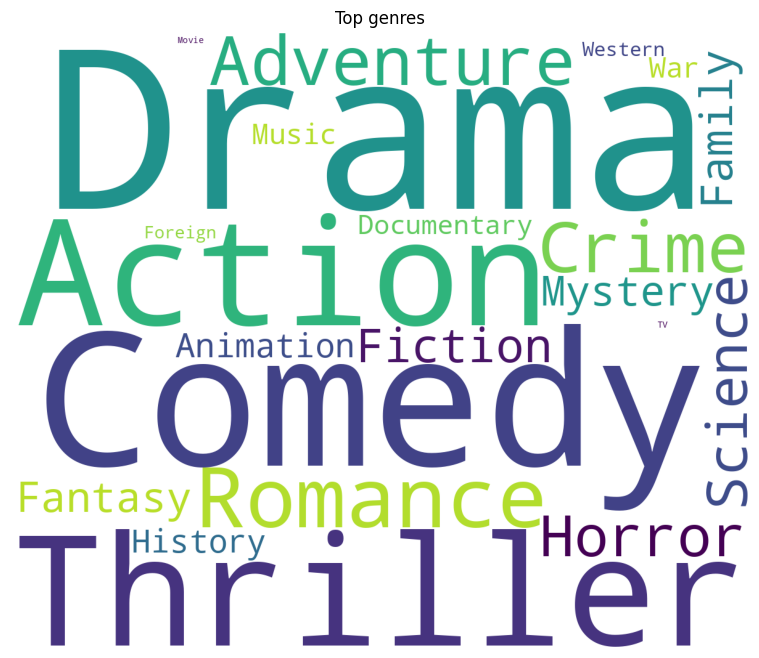

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize=(12, 8))
text = ' '.join([i for j in list_of_genres for i in j])
# 设置参数
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top genres')
plt.axis("off")
plt.show()

在上面的词图中，词的字体越大，表示该词数量越多，即出现的频率越高。

在该列中，我们可以提取一部电影包含类型的数量，以及该电影所属的全部类型。

In [ ]:
df['num_genres'] = df['genres'].apply(
    lambda x: len(eval(x)) if type(x) == str else 0)
df['all_genres'] = df['genres'].apply(lambda x: ' '.join(
    sorted([i['name'] for i in eval(x)])) if type(x) == str else '')
top_genres = [m[0] for m in Counter(
    [i for j in list_of_genres for i in j]).most_common(15)]
for g in top_genres:
    df['genre_' + g] = df['all_genres'].apply(lambda x: 1 if g in x else 0)
cols = [i for i in df.columns if 'genre_' in str(i)]
df[cols].head()

genre_Drama  genre_Comedy  genre_Thriller  genre_Action  genre_Romance  \
0            0             1               0             0              0   
1            1             1               0             0              1   
2            1             0               0             0              0   
3            1             0               1             0              0   
4            0             0               1             1              0   

   genre_Crime  genre_Adventure  genre_Horror  genre_Science Fiction  \
0            0                0             0                      0   
1            0                0             0                      0   
2            0                0             0                      0   
3            0                0             0                      0   
4            0                0             0                      0   

   genre_Family  genre_Fantasy  genre_Mystery  genre_Animation  genre_History  \
0             0              0              0                0              0   
1             1              0              0                0              0   
2             0              0              0                0              0   
3             0              0              0                0              0   
4             0              0              0                0              0   

   genre_Music  
0            0  
1            0  
2            0  
3            0  
4            0

在上面显示的结果中，genre_Drama、genre_Comedy等列即是我们所提取的特征列，其表示的含义是如果一部电影属于该类型，则在该列中的值为1否则为0。这种处理思路类似我们常见的One-Hot编码。

前面我们统计出来每种类型的电影数量。现在统计出类型与票房和上映年份的关系。这里我们会使用到plotly库来进行绘图，先安装相关的绘图工具库。

In [ ]:
!pip install plotly

导入相关的库。

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=False)


画出三者的关系图。从上图可以知道，在2000年之后，动作（Action）题材的电影的票房在逐渐增加，这也从侧面显示了动作电影越来越受观众的青睐。

In [ ]:
drama = df.loc[df['genre_Drama'] == 1, ]  # 得到所有电影类型为 Drama 的数据
comedy = df.loc[df['genre_Comedy'] == 1, ]
action = df.loc[df['genre_Action'] == 1, ]
thriller = df.loc[df['genre_Thriller'] == 1, ]

drama_revenue = drama.groupby(['release_year']).mean()['revenue']  # 求出票房的平均值
comedy_revenue = comedy.groupby(['release_year']).mean()['revenue']
action_revenue = action_revenue = action.groupby(
    ['release_year']).mean()['revenue']
thriller_revenue = thriller.groupby(['release_year']).mean()['revenue']

revenue_concat = pd.concat([drama_revenue,    # 将数据合并为一份
                            comedy_revenue,
                            action_revenue,
                            thriller_revenue],
                           axis=1)

revenue_concat.columns = ['drama', 'comedy', 'action', 'thriller']
revenue_concat.index = df.groupby(['release_year']).mean().index

data = [go.Scatter(x=revenue_concat.index, y=revenue_concat.drama, name='drama'),
        go.Scatter(x=revenue_concat.index,
                   y=revenue_concat.comedy, name='comedy'),
        go.Scatter(x=revenue_concat.index,
                   y=revenue_concat.action, name='action'),
        go.Scatter(x=revenue_concat.index, y=revenue_concat.thriller, name='thriller')]
# 画出图形
layout = go.Layout(dict(title='Mean Revenue by Top 4 Movie Genres Over Years',
                        xaxis=dict(title='Year'),
                        yaxis=dict(title='Revenue'),
                        ), legend=dict(
    orientation="v"))

py.iplot(dict(data=data, layout=layout))

**制片公司**

同样的方法，现在来看制片公司（production_companies）。

In [ ]:
for i, e in enumerate(df['production_companies'][:5]):
    print(i, e)

0 [{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]
1 [{'name': 'Walt Disney Pictures', 'id': 2}]
2 [{'name': 'Bold Films', 'id': 2266}, {'name': 'Blumhouse Productions', 'id': 3172}, {'name': 'Right of Way Films', 'id': 32157}]
3 nan
4 nan


从上面可知，同一个电影可能来源于多个制片公司。现在来画出制片公司发行的电影数量。

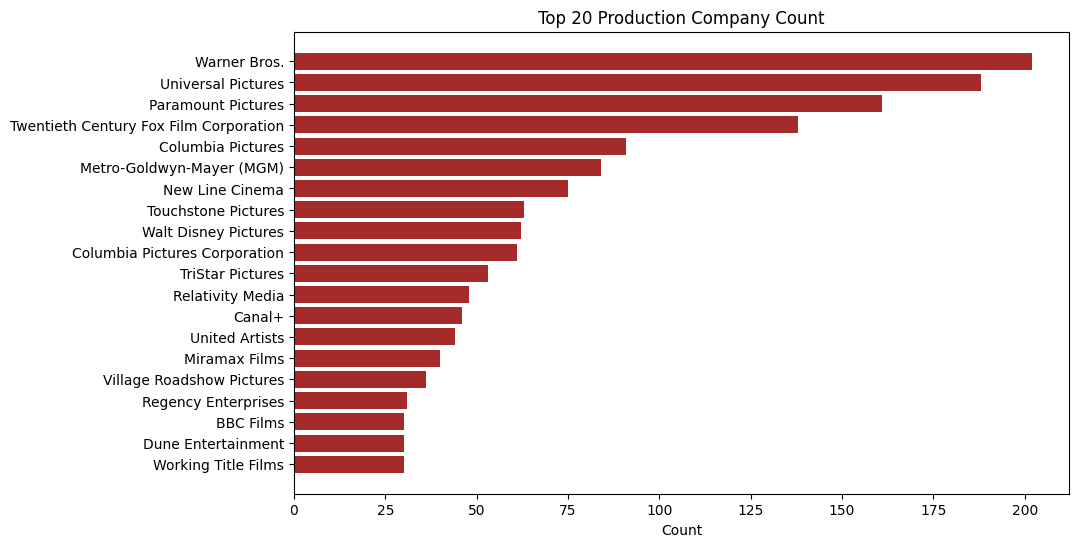

In [ ]:
list_of_companies = list(df['production_companies'].apply(
    lambda x: [i['name'] for i in eval(x)] if type(x) == str else []).values)
# 得到每个公司的电影发行量
most_common_companies = Counter(
    [i for j in list_of_companies for i in j]).most_common(20)
fig = plt.figure(figsize=(10, 6))
data = dict(most_common_companies)
names = list(data.keys())
values = list(data.values())

plt.barh(sorted(range(len(data)), reverse=True),
         values, tick_label=names, color='brown')
plt.xlabel('Count')
plt.title('Top 20 Production Company Count')
plt.show()

从上图可知，Warner Bros制作的电影最多。Warner Bros也即是著名的华纳兄弟娱乐公司。

同样，我们现在要从该列中提取一些重要的信息。这里与电影类型的提取类似。

In [ ]:
df['num_companies'] = df['production_companies'].apply(
    lambda x: len(x) if type(x) == str else 0)
df['all_production_companies'] = df['production_companies'].apply(
    lambda x: ' '.join(sorted([i['name'] for i in eval(x)])) if type(x) == str else '')
top_companies = [m[0] for m in Counter(
    [i for j in list_of_companies for i in j]).most_common(30)]
for g in top_companies:
    df['production_company_' +
        g] = df['all_production_companies'].apply(lambda x: 1 if g in x else 0)

cols = [i for i in df.columns if 'production_company' in str(i)]
df[cols].head()

production_company_Warner Bros.  production_company_Universal Pictures  \
0                                0                                      0   
1                                0                                      0   
2                                0                                      0   
3                                0                                      0   
4                                0                                      0   

   production_company_Paramount Pictures  \
0                                      1   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   production_company_Twentieth Century Fox Film Corporation  \
0                                                  0           
1                                                  0           
2                                                  0           
3                                                  0           
4                                                  0           

   production_company_Columbia Pictures  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   production_company_Metro-Goldwyn-Mayer (MGM)  \
0                                             1   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   production_company_New Line Cinema  production_company_Touchstone Pictures  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   

   production_company_Walt Disney Pictures  \
0                                        0   
1                                        1   
2                                        0   
3                                        0   
4                                        0   

   production_company_Columbia Pictures Corporation  ...  \
0                                                 0  ...   
1                                                 0  ...   
2                                                 0  ...   
3                                                 0  ...   
4                                                 0  ...   

   production_company_Fox Searchlight Pictures  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   production_company_StudioCanal  production_company_Lionsgate  \
0                               0                             0   
1                               0                             0   
2                               0                             0   
3                               0                             0   
4                               0                             0   

   production_company_DreamWorks SKG  production_company_Fox 2000 Pictures  \
0                                  0                                     0   
1                                  0                                     0   
2                                  0                                     0   
3                                  0                                     0   
4                                  0                                     0   

   production_company_Summ

在上面的提取结果中，production_company_Warner Bros、production_company_Universal Pictures等列即是我们所提取的列，其表示的含义是如果一部电影属于该公司出产，那么该电影在该公司所对应的的列的值为 1 否则为 0。

进行上面的提取之后，我们现在来画出几个公司制作的电影票房数量。

Text(0.5, 0, 'Revenue (100 million dollars)')

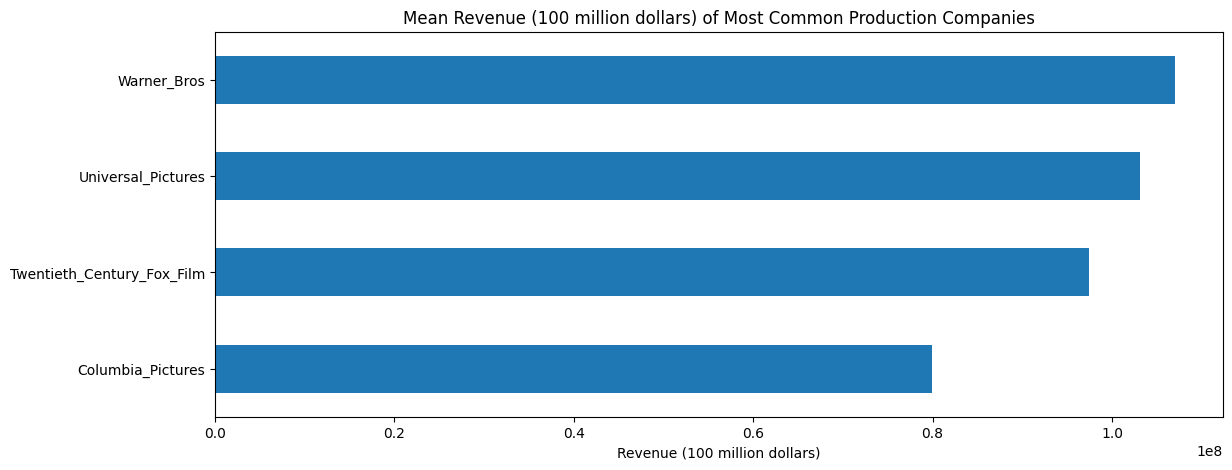

In [ ]:
Warner_Bros = df.loc[df['production_company_Warner Bros.'] == 1, ]
Universal_Pictures = df.loc[df['production_company_Universal Pictures'] == 1, ]
Twentieth_Century_Fox_Film = df.loc[
    df['production_company_Twentieth Century Fox Film Corporation'] == 1, ]
Columbia_Pictures = df.loc[df['production_company_Columbia Pictures'] == 1, ]

Warner_Bros_revenue = Warner_Bros.groupby(['release_year']).mean()['revenue']
Universal_Pictures_revenue = Universal_Pictures.groupby(
    ['release_year']).mean()['revenue']
Twentieth_Century_Fox_Film_revenue = Twentieth_Century_Fox_Film.groupby(
    ['release_year']).mean()['revenue']
Columbia_Pictures_revenue = Columbia_Pictures.groupby(
    ['release_year']).mean()['revenue']

prod_revenue_concat = pd.concat([Warner_Bros_revenue,
                                 Universal_Pictures_revenue,
                                 Twentieth_Century_Fox_Film_revenue,
                                 Columbia_Pictures_revenue], axis=1)
prod_revenue_concat.columns = ['Warner_Bros',
                               'Universal_Pictures',
                               'Twentieth_Century_Fox_Film',
                               'Columbia_Pictures']

fig = plt.figure(figsize=(13, 5))
prod_revenue_concat.agg("mean", axis='rows').sort_values(ascending=True).plot(kind='barh',
                                                                              x='Production Companies',
                                                                              y='Revenue',
                                                                              title='Mean Revenue (100 million dollars) of Most Common Production Companies')
plt.xlabel('Revenue (100 million dollars)')

现在来分析制片公司与年份和票房的关系。

In [ ]:
data = [go.Scatter(x=prod_revenue_concat.index, y=prod_revenue_concat.Warner_Bros, name='Warner_Bros'),
        go.Scatter(x=prod_revenue_concat.index,
                   y=prod_revenue_concat.Universal_Pictures, name='Universal_Pictures'),
        go.Scatter(x=prod_revenue_concat.index,
                   y=prod_revenue_concat.Twentieth_Century_Fox_Film, name='Twentieth_Century_Fox_Film'),
        go.Scatter(x=prod_revenue_concat.index, y=prod_revenue_concat.Columbia_Pictures, name='Columbia_Pictures'), ]

layout = go.Layout(dict(title='Mean Revenue of Movie Production Companies over Years',
                        xaxis=dict(title='Year'),
                        yaxis=dict(title='Revenue'),
                        ), legend=dict(
    orientation="v"))
py.iplot(dict(data=data, layout=layout))

**出版国家**

上面一小节主要分析了制片公司，现在来分析一下电影的出版国家，即电影是哪一个国家搞出来的。

In [ ]:
for i, e in enumerate(df['production_countries'][:5]):
    print(i, e)

0 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
1 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
2 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
3 [{'iso_3166_1': 'IN', 'name': 'India'}]
4 [{'iso_3166_1': 'KR', 'name': 'South Korea'}]


从上面可以看到，在production_countries中，name表示的是国家的全称，而iso_3166_1表示的是国家的简称。现在我们来看一下哪个国家出产的电影更多。

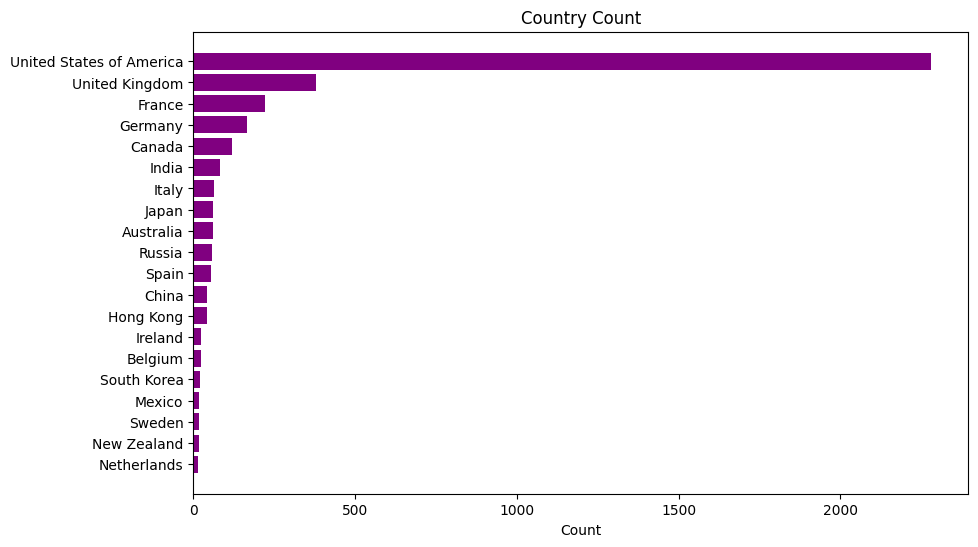

In [ ]:
list_of_countries = list(df['production_countries'].apply(
    lambda x: [i['name'] for i in eval(x)] if type(x) == str else []).values)
most_common_countries = Counter(
    [i for j in list_of_countries for i in j]).most_common(20)

fig = plt.figure(figsize=(10, 6))
data = dict(most_common_countries)
names = list(data.keys())
values = list(data.values())

plt.barh(sorted(range(len(data)), reverse=True),
         values, tick_label=names, color='purple')
plt.xlabel('Count')
plt.title('Country Count')
plt.show()

从上图可以看出，美国出版的电影最多；其次是英国；再次是法国。而中国香港的票房几乎与中国内地持平，这似乎有点出乎意料。

同样的方法，我们现在来对电影出产国家进行特征提取。

In [ ]:
df['num_countries'] = df['production_countries'].apply(
    lambda x: len(eval(x)) if type(x) == str else 0)
df['all_countries'] = df['production_countries'].apply(lambda x: ' '.join(
    sorted([i['name'] for i in eval(x)])) if type(x) == str else '')
top_countries = [m[0] for m in Counter(
    [i for j in list_of_countries for i in j]).most_common(25)]
for g in top_countries:
    df['production_country_' +
        g] = df['all_countries'].apply(lambda x: 1 if g in x else 0)

cols = [i for i in df.columns if 'production_country' in str(i)]
df[cols].head()

production_country_United States of America  \
0                                            1   
1                                            1   
2                                            1   
3                                            0   
4                                            0   

   production_country_United Kingdom  production_country_France  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                                  0                          0   
4                                  0                          0   

   production_country_Germany  production_country_Canada  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

   production_country_India  production_country_Italy  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         1                         0   
4                         0                         0   

   production_country_Japan  production_country_Australia  \
0                         0                             0   
1                         0                             0   
2                         0                             0   
3                         0                             0   
4                         0                             0   

   production_country_Russia  ...  production_country_South Korea  \
0                          0  ...                               0   
1                          0  ...                               0   
2                          0  ...                               0   
3                          0  ...                               0   
4                          0  ...                               1   

   production_country_Mexico  production_country_Sweden  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   production_country_New Zealand  production_country_Netherlands  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   production_country_Czech Republic  production_country_Denmark  \
0                                  0                           0   
1                                  0                           0   
2                                  0                           0   
3                                  0                           0   
4                                  0                           0   

   production_country_Brazil  production_country_Luxembourg  \
0                          0                              0   
1                          0                              0   
2                          0                              0   
3                          0                              0   
4                          0                              0   

   production_country_South Africa  
0                                0  
1                                0  
2                                0  
3                                0  
4                                0  

[5 rows x 25 columns]

在所提取到的特征列中，如果一部电影属于某个国家，那么该电影在某个国家所对应的的列中的值为1，否则为0。

**电影语言**

我们都知道，不同国家可能使用不同的语言，所以电影的语言也不尽相同。现在来看电影语言列（spoken_languages）。

In [ ]:
for i, e in enumerate(df['spoken_languages'][:5]):
    print(i, e)

0 [{'iso_639_1': 'en', 'name': 'English'}]
1 [{'iso_639_1': 'en', 'name': 'English'}]
2 [{'iso_639_1': 'en', 'name': 'English'}]
3 [{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'hi', 'name': 'हिन्दी'}]
4 [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]


在该列中，name表示电影语言，iso_639_1表示语言的简写。同时还可以看到，一部电影可能还有多个语言。现在对语言进行统计，查看一下什么语言的电影最多。

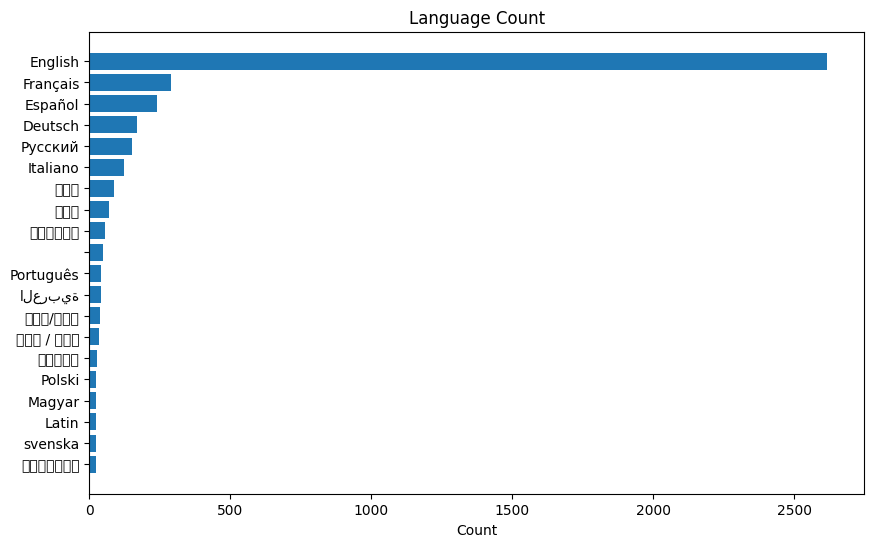

In [ ]:
list_of_languages = list(df['spoken_languages'].apply(
    lambda x: [i['name'] for i in eval(x)] if type(x) == str else []).values)

most_common_languages = Counter(
    [i for j in list_of_languages for i in j]).most_common(20)

fig = plt.figure(figsize=(10, 6))
data = dict(most_common_languages)
names = list(data.keys())
values = list(data.values())

plt.barh(sorted(range(len(data)), reverse=True), values, tick_label=names)
plt.xlabel('Count')
plt.title('Language Count')
plt.show()

可能你也已经猜到，英语肯定是最多的，从上图显示的结果也的确如此。同样的方法来对语言提取特征。

In [ ]:
df['num_languages'] = df['spoken_languages'].apply(
    lambda x: len(eval(x)) if type(x) == str else 0)
df['all_languages'] = df['spoken_languages'].apply(lambda x: ' '.join(
    sorted([i['iso_639_1'] for i in eval(x)])) if type(x) == str else '')
top_languages = [m[0] for m in Counter(
    [i for j in list_of_languages for i in j]).most_common(30)]
for g in top_languages:
    df['language_' +
        g] = df['all_languages'].apply(lambda x: 1 if g in x else 0)
cols = [i for i in df.columns if 'language_' in str(i)]
df[cols].head()

language_English  language_Français  language_Español  language_Deutsch  \
0                 0                  0                 0                 0   
1                 0                  0                 0                 0   
2                 0                  0                 0                 0   
3                 0                  0                 0                 0   
4                 0                  0                 0                 0   

   language_Pусский  language_Italiano  language_日本語  language_普通话  \
0                 0                  0             0             0   
1                 0                  0             0             0   
2                 0                  0             0             0   
3                 0                  0             0             0   
4                 0                  0             0             0   

   language_हिन्दी  language_  ...  language_Český  language_עִבְרִית  \
0                0          1  ...               0                  0   
1                0          1  ...               0                  0   
2                0          1  ...               0                  0   
3                0          1  ...               0                  0   
4                0          1  ...               0                  0   

   language_ελληνικά  language_Türkçe  language_Dansk  language_Nederlands  \
0                  0                0               0                    0   
1                  0                0               0                    0   
2                  0                0               0                    0   
3                  0                0               0                    0   
4                  0                0               0                    0   

   language_فارسی  language_Tiếng Việt  language_اردو  language_Română  
0               0                    0              0                0  
1               0                    0              0                0  
2               0                    0              0                0  
3               0                    0              0                0  
4               0                    0              0                0  

[5 rows x 30 columns]

**关键字**

在数据集中，存在一个关键字列（Keywords）。我们使用同样的方法来处理该列。

In [ ]:
for i, e in enumerate(df['Keywords'][:5]):
    print(i, e)

0 [{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot tub'}, {'id': 179431, 'name': 'duringcreditsstinger'}]
1 [{'id': 2505, 'name': 'coronation'}, {'id': 4263, 'name': 'duty'}, {'id': 6038, 'name': 'marriage'}, {'id': 13072, 'name': 'falling in love'}]
2 [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'name': 'obsession'}, {'id': 1640, 'name': 'conservatory'}, {'id': 2176, 'name': 'music teacher'}, {'id': 14512, 'name': 'new york city'}, {'id': 14819, 'name': 'violence'}, {'id': 33896, 'name': 'montage'}, {'id': 156823, 'name': 'drummer'}, {'id': 170418, 'name': 'public humiliation'}, {'id': 176095, 'name': 'jazz band'}, {'id': 206298, 'name': 'young adult'}, {'id': 207739, 'name': 'music school'}]
3 [{'id': 10092, 'name': 'mystery'}, {'id': 10540, 'name': 'bollywood'}, {'id': 11734, 'name': 'police corruption'}, {'id': 14536, 'name': 'crime'}, {'id': 14636, 'name': 'india'}, {'id': 208364, 'name': 'missing husband'}, {'id': 220935, 'name': 'ne

关键字表示的一部电影的主题内容。例如在犯罪题材的电影中，关键字就可能有警察、毒枭等关键字。现在对关键字进行统计。

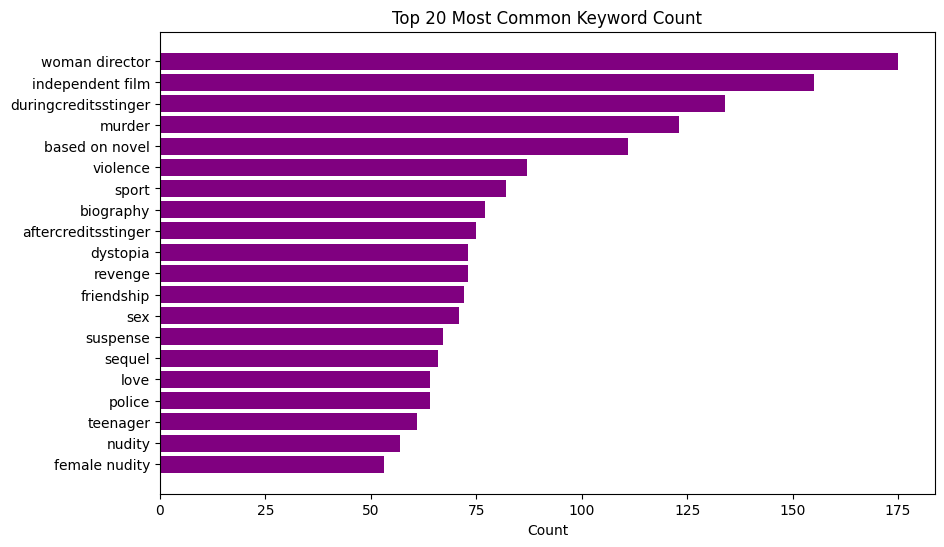

In [ ]:
list_of_keywords = list(df['Keywords'].apply(
    lambda x: [i['name'] for i in eval(x)] if type(x) == str else []).values)

most_common_keywords = Counter(
    [i for j in list_of_keywords for i in j]).most_common(20)

fig = plt.figure(figsize=(10, 6))
data = dict(most_common_keywords)
names = list(data.keys())
values = list(data.values())

plt.barh(sorted(range(len(data)), reverse=True),
         values, tick_label=names, color='purple')
plt.xlabel('Count')
plt.title('Top 20 Most Common Keyword Count')
plt.show()

从上面的结果看出，女导演（woman director）出现的次数最多。现在我们可以分析一下，一些电影题材的关键字。

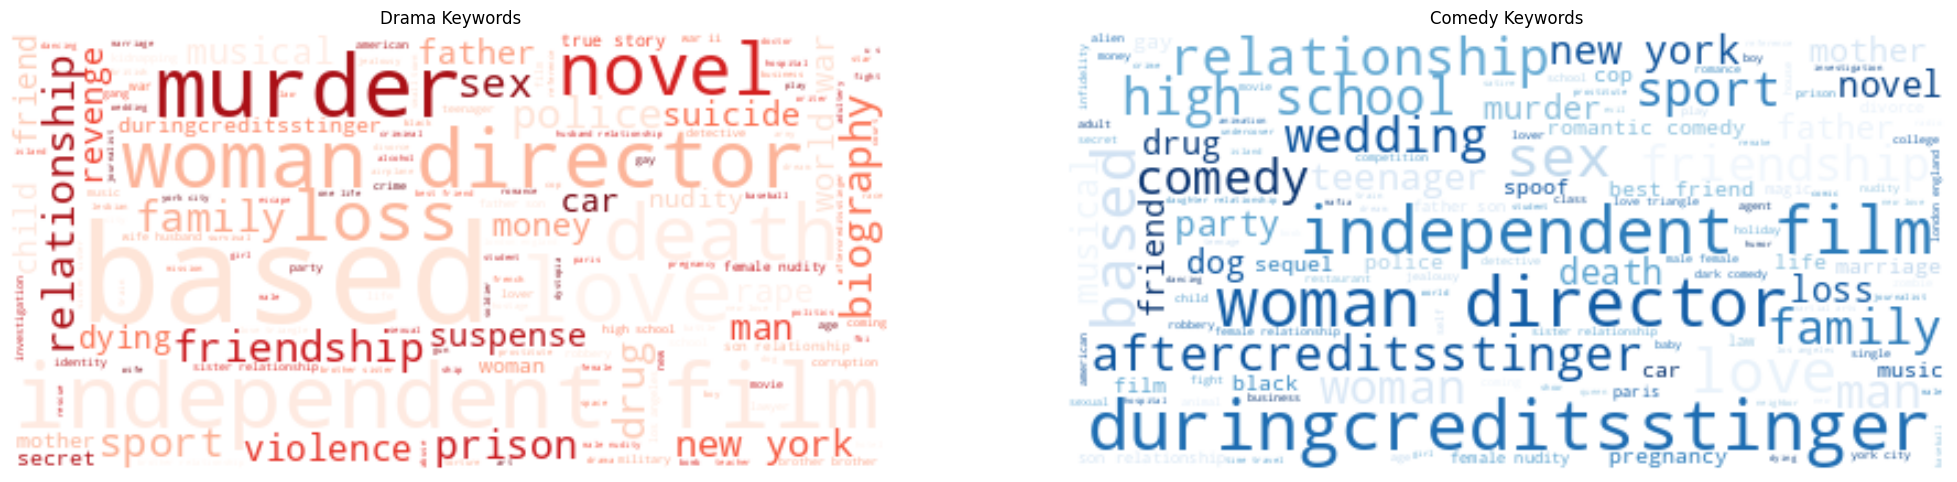

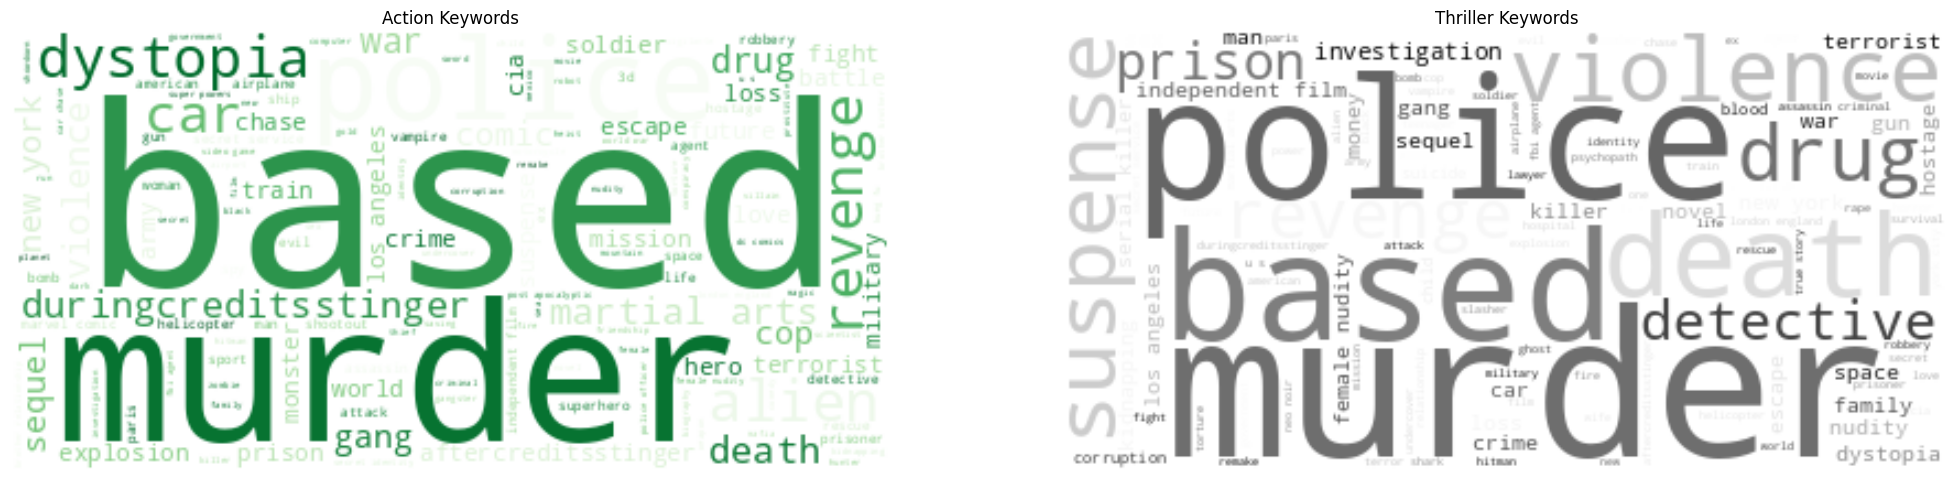

In [ ]:
text_drama = " ".join(review for review in drama['Keywords'].apply(
    lambda x: ' '.join(sorted([i['name'] for i in eval(x)])) if type(x) == str else ''))
text_comedy = " ".join(review for review in comedy['Keywords'].apply(
    lambda x: ' '.join(sorted([i['name'] for i in eval(x)])) if type(x) == str else ''))
text_action = " ".join(review for review in action['Keywords'].apply(
    lambda x: ' '.join(sorted([i['name'] for i in eval(x)])) if type(x) == str else ''))
text_thriller = " ".join(review for review in thriller['Keywords'].apply(
    lambda x: ' '.join(sorted([i['name'] for i in eval(x)])) if type(x) == str else ''))

wordcloud1 = WordCloud(background_color="white",
                       colormap="Reds").generate(text_drama)
wordcloud2 = WordCloud(background_color="white",
                       colormap="Blues").generate(text_comedy)
wordcloud3 = WordCloud(background_color="white",
                       colormap="Greens").generate(text_action)
wordcloud4 = WordCloud(background_color="white",
                       colormap="Greys").generate(text_thriller)


fig = plt.figure(figsize=(25, 20))

plt.subplot(221)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.title('Drama Keywords')
plt.axis("off")

plt.subplot(222)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.title('Comedy Keywords')
plt.axis("off")
plt.show()

fig = plt.figure(figsize=(25, 20))

plt.subplot(223)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.title('Action Keywords')
plt.axis("off")

plt.subplot(224)
plt.imshow(wordcloud4, interpolation='bilinear')
plt.title('Thriller Keywords')
plt.axis("off")
plt.show()

从上面的词云图可以看出，剧情（Drama）类和喜剧类（Comedy）电影的关键字大都都含有家庭（family）、女性（woman）基于小说改编（based novel）等，而动作类（Action）和犯罪类（Thriller）则出现警察（police）、死亡（death）等关键词最多。

同样的方法来对该列进行特征提取。

In [ ]:
df['num_Keywords'] = df['Keywords'].apply(
    lambda x: len(eval(x)) if type(x) == str else 0)
df['all_Keywords'] = df['Keywords'].apply(lambda x: ' '.join(
    sorted([i['name'] for i in eval(x)])) if type(x) == str else '')
top_keywords = [m[0] for m in Counter(
    [i for j in list_of_keywords for i in j]).most_common(30)]
for g in top_keywords:
    df['keyword_' + g] = df['all_Keywords'].apply(lambda x: 1 if g in x else 0)
cols = [i for i in df.columns if 'keyword_' in str(i)]
df[cols].head()

keyword_woman director  keyword_independent film  \
0                       0                         0   
1                       0                         0   
2                       0                         0   
3                       0                         0   
4                       0                         0   

   keyword_duringcreditsstinger  keyword_murder  keyword_based on novel  \
0                             1               0                       0   
1                             0               0                       0   
2                             0               0                       0   
3                             0               0                       0   
4                             0               0                       0   

   keyword_violence  keyword_sport  keyword_biography  \
0                 0              0                  0   
1                 0              0                  0   
2                 1              0                  0   
3                 0              0                  0   
4                 0              0                  0   

   keyword_aftercreditsstinger  keyword_dystopia  ...  keyword_drug  \
0                            0                 0  ...             0   
1                            0                 0  ...             0   
2                            0                 0  ...             0   
3                            0                 0  ...             0   
4                            0                 0  ...             0   

   keyword_prison  keyword_musical  keyword_high school  keyword_los angeles  \
0               0                0                    0                    0   
1               0                0                    0                    0   
2               0                0                    0                    0   
3               0                0                    0                    0   
4               0                0                    0                    0   

   keyword_new york  keyword_family  keyword_father son relationship  \
0                 0               0                                0   
1                 0               0                                0   
2                 1               0                                0   
3                 0               0                                0   
4                 0               0                                0   

   keyword_kidnapping  keyword_investigation  
0                   0                      0  
1                   0                      0  
2                   0                      0  
3                   0                      0  
4                   0                      0  

[5 rows x 30 columns]

**演员**

电影的好坏，演员在很多层面上也取到一定的作用。因此现在来看演员列。

In [ ]:
for i, e in enumerate(df['cast'][:1]):
    print(i, e)

0 [{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}, {'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}, {'cast_id': 6, 'character': 'Jacob', 'credit_id': '52fe4ee7c3a36847f82afaef', 'gender': 2, 'id': 54729, 'name': 'Clark Duke', 'order': 2, 'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}, {'cast_id': 7, 'character': 'Adam Jr.', 'credit_id': '52fe4ee7c3a36847f82afaf3', 'gender': 2, 'id': 36801, 'name': 'Adam Scott', 'order': 3, 'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'}, {'cast_id': 8, 'character': 'Hot Tub Repairman', 'credit_id': '52fe4ee7c3a36847f82afaf7', 'gender': 2, 'id': 54812, 'name': 'Chevy Chase', 'order': 4, 'profile_path': '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'}, {'cast_id': 9, 'characte

从上面的结果可以看到，演员的信息包括性别（gender）、姓名（name）等。现在统计一下哪些演员演过的电影最多。

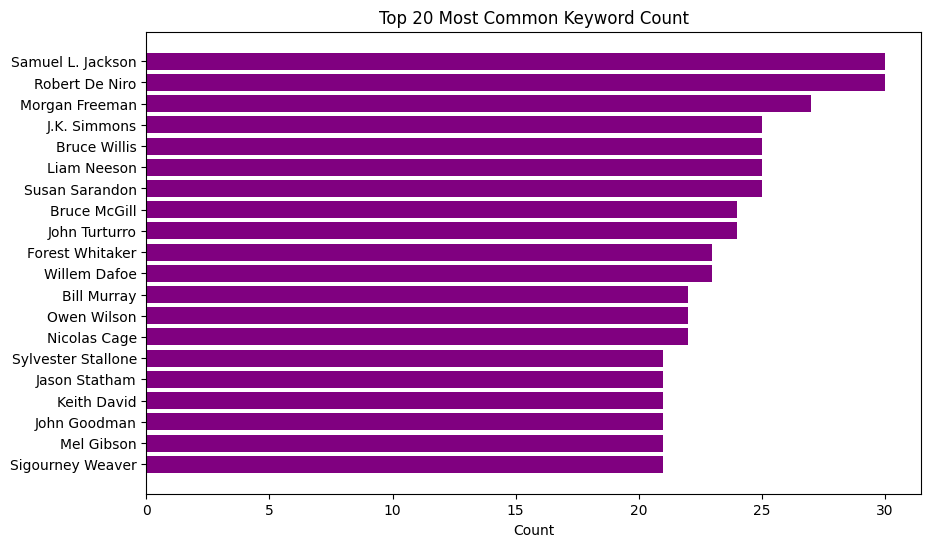

In [ ]:
list_of_cast_names = list(df['cast'].apply(
    lambda x: [i['name'] for i in eval(x)] if type(x) == str else []).values)
most_common_keywords = Counter(
    [i for j in list_of_cast_names for i in j]).most_common(20)

fig = plt.figure(figsize=(10, 6))
data = dict(most_common_keywords)
names = list(data.keys())
values = list(data.values())

plt.barh(sorted(range(len(data)), reverse=True),
         values, tick_label=names, color='purple')
plt.xlabel('Count')
plt.title('Top 20 Most Common Keyword Count')
plt.show()

从上的结果可以看到，塞缪尔·杰克逊（Samuel L. Jackson）演过的电影最多。对于很多中国人来说，可能很多的国人名字不是很容易记住。

现在来提取特征。

In [ ]:
df['num_cast'] = df['cast'].apply(
    lambda x: len(eval(x)) if type(x) == str else 0)
df['all_cast'] = df['cast'].apply(lambda x: ' '.join(
    sorted([i['name'] for i in eval(x)])) if type(x) == str else '')
top_cast_names = [m[0] for m in Counter(
    [i for j in list_of_cast_names for i in j]).most_common(30)]
for g in top_cast_names:
    df['cast_name_' + g] = df['all_cast'].apply(lambda x: 1 if g in x else 0)
cols = [i for i in df.columns if 'cast_name' in str(i)]
df[cols].head()

cast_name_Samuel L. Jackson  cast_name_Robert De Niro  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   

   cast_name_Morgan Freeman  cast_name_J.K. Simmons  cast_name_Bruce Willis  \
0                         0                       0                       0   
1                         0                       0                       0   
2                         0                       1                       0   
3                         0                       0                       0   
4                         0                       0                       0   

   cast_name_Liam Neeson  cast_name_Susan Sarandon  cast_name_Bruce McGill  \
0                      0                         0                       0   
1                      0                         0                       0   
2                      0                         0                       0   
3                      0                         0                       0   
4                      0                         0                       0   

   cast_name_John Turturro  cast_name_Forest Whitaker  ...  \
0                        0                          0  ...   
1                        0                          0  ...   
2                        0                          0  ...   
3                        0                          0  ...   
4                        0                          0  ...   

   cast_name_Frank Welker  cast_name_Michael Caine  cast_name_George Clooney  \
0                       0                        0                         0   
1                       0                        0                         0   
2                       0                        0                         0   
3                       0                        0                         0   
4                       0                        0                         0   

   cast_name_Denzel Washington  cast_name_Robert Duvall  cast_name_Ed Harris  \
0                            0                        0                    0   
1                            0                        0                    0   
2                            0                        0                    0   
3                            0                        0                    0   
4                            0                        0                    0   

   cast_name_Dennis Quaid  cast_name_Richard Jenkins  cast_name_Matt Damon  \
0                       0                          0                     0   
1                       0                          0                     0   
2                       0                          0                     0   
3                       0                          0                     0   
4                       0                          0                     0   

   cast_name_Christopher Plummer  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0  

[5 rows x 30 columns]

画出参演数量最多的演员所获得的电影票房情况。

Text(0.5, 0, 'Revenue (100 million dollars)')

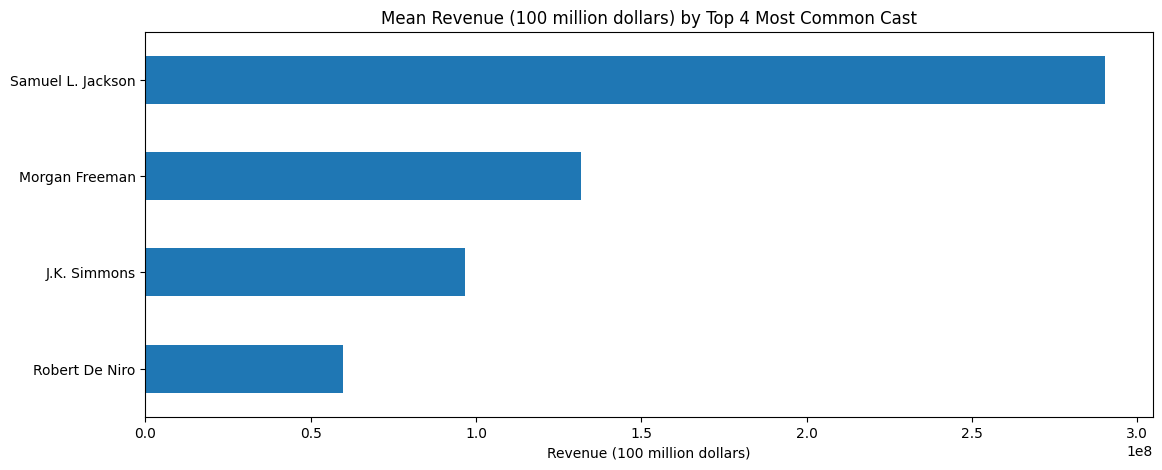

In [ ]:
cast_name_Samuel_L_Jackson = df.loc[df['cast_name_Samuel L. Jackson'] == 1, ]
cast_name_Robert_De_Niro = df.loc[df['cast_name_Robert De Niro'] == 1, ]
cast_name_Morgan_Freeman = df.loc[df['cast_name_Morgan Freeman'] == 1, ]
cast_name_J_K_Simmons = df.loc[df['cast_name_J.K. Simmons'] == 1, ]


cast_name_Samuel_L_Jackson_revenue = cast_name_Samuel_L_Jackson.mean()[
    'revenue']
cast_name_Robert_De_Niro_revenue = cast_name_Robert_De_Niro.mean()['revenue']
cast_name_Morgan_Freeman_revenue = cast_name_Morgan_Freeman.mean()['revenue']
cast_name_J_K_Simmons_revenue = cast_name_J_K_Simmons.mean()['revenue']


cast_revenue_concat = pd.Series([cast_name_Samuel_L_Jackson_revenue,
                                 cast_name_Robert_De_Niro_revenue,
                                 cast_name_Morgan_Freeman_revenue,
                                 cast_name_J_K_Simmons_revenue])

cast_revenue_concat.index = ['Samuel L. Jackson',
                             'Robert De Niro',
                             'Morgan Freeman',
                             'J.K. Simmons', ]

fig = plt.figure(figsize=(13, 5))
cast_revenue_concat.sort_values(ascending=True).plot(
    kind='barh', title='Mean Revenue (100 million dollars) by Top 4 Most Common Cast')
plt.xlabel('Revenue (100 million dollars)')

现在对演员性别等特征进行提取。

In [ ]:
list_of_cast_genders = list(df['cast'].apply(
    lambda x: [i['gender'] for i in eval(x)] if type(x) == str else []).values)
list_of_cast_characters = list(df['cast'].apply(
    lambda x: [i['character'] for i in eval(x)] if type(x) == str else []).values)

df['genders_0'] = sum([1 for i in list_of_cast_genders if i == 0])
df['genders_1'] = sum([1 for i in list_of_cast_genders if i == 1])
df['genders_2'] = sum([1 for i in list_of_cast_genders if i == 2])
top_cast_characters = [m[0] for m in Counter(
    [i for j in list_of_cast_characters for i in j]).most_common(15)]
for g in top_cast_characters:
    df['cast_character_' +
        g] = df['cast'].apply(lambda x: 1 if type(x) == str and g in x else 0)
cols = [i for i in df.columns if 'cast_cha' in str(i)]
df[cols].head()

cast_character_  cast_character_Himself  cast_character_Herself  \
0                1                       1                       1   
1                1                       0                       0   
2                1                       0                       0   
3                1                       0                       0   
4                1                       0                       0   

   cast_character_Dancer  cast_character_Additional Voices (voice)  \
0                      0                                         0   
1                      0                                         0   
2                      0                                         0   
3                      0                                         0   
4                      0                                         0   

   cast_character_Doctor  cast_character_Reporter  cast_character_Waitress  \
0                      0                        0                        0   
1                      0                        0                        0   
2                      0                        0                        0   
3                      0                        0                        0   
4                      0                        0                        0   

   cast_character_Nurse  cast_character_Bartender  cast_character_Jack  \
0                     0                         0                    0   
1                     0                         0                    0   
2                     0                         1                    0   
3                     0                         0                    0   
4                     0                         0                    0   

   cast_character_Debutante  cast_character_Security Guard  \
0                         0                              0   
1                         0                              0   
2                         0                              0   
3                         0                              0   
4                         0                              0   

   cast_character_Paul  cast_character_Frank  
0                    0                     0  
1                    1                     0  
2                    1                     1  
3                    0                     0  
4                    0                     0

**制作团队**

一部电影的好坏与制作团队的也是分不开的，现在来看电影的制作团队。

In [ ]:
for i, e in enumerate(df['crew'][:1]):
    print(i, e)

0 [{'credit_id': '59ac067c92514107af02c8c8', 'department': 'Directing', 'gender': 0, 'id': 1449071, 'job': 'First Assistant Director', 'name': 'Kelly Cantley', 'profile_path': None}, {'credit_id': '52fe4ee7c3a36847f82afad7', 'department': 'Directing', 'gender': 2, 'id': 3227, 'job': 'Director', 'name': 'Steve Pink', 'profile_path': '/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg'}, {'credit_id': '5524ed25c3a3687ded000d88', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Writer', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}, {'credit_id': '5524ed2d925141720c001128', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Characters', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}, {'credit_id': '5524ed3d92514166c1004a5d', 'department': 'Production', 'gender': 2, 'id': 57822, 'job': 'Producer', 'name': 'Andrew Panay', 'profile_path': None}, {'credit_id': '5524ed4bc3a3687df3000dd2', 'department': 'Production', 'gender': 0, 'id': 14

从上面的结果可以看出，制作团队包括导演，副导演、电影配乐等信息。现在来统计一下团队人物制作的电影数量。

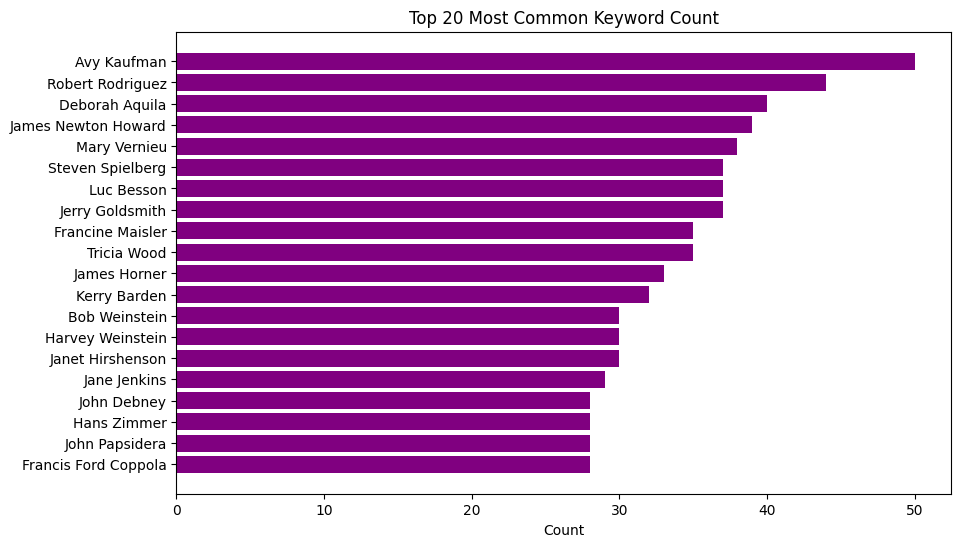

In [ ]:
list_of_crew_names = list(df['crew'].apply(
    lambda x: [i['name'] for i in eval(x)] if type(x) == str else []).values)
most_common_keywords = Counter(
    [i for j in list_of_crew_names for i in j]).most_common(20)

fig = plt.figure(figsize=(10, 6))
data = dict(most_common_keywords)
names = list(data.keys())
values = list(data.values())

plt.barh(sorted(range(len(data)), reverse=True),
         values, tick_label=names, color='purple')
plt.xlabel('Count')
plt.title('Top 20 Most Common Keyword Count')
plt.show()

从上面可以看到avy Kaufman，Robert Rodriguez等导演参与制作的电影最多。现在进行特征提取。

同样对排名前4位导演进行分析。

In [ ]:
df['num_crew'] = df['crew'].apply(
    lambda x: len(eval(x)) if type(x) == str else 0)
df['all_crew'] = df['crew'].apply(lambda x: ' '.join(
    sorted([i['name'] for i in eval(x)])) if type(x) == str else '')
top_crew_names = [m[0] for m in Counter(
    [i for j in list_of_crew_names for i in j]).most_common(30)]
for g in top_crew_names:
    df['crew_name_' +
        g] = df['all_crew'].apply(lambda x: 1 if type(x) == str and g in x else 0)
cols = [i for i in df.columns if 'crew_name' in str(i)]
df[cols].head()

crew_name_Avy Kaufman  crew_name_Robert Rodriguez  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   crew_name_Deborah Aquila  crew_name_James Newton Howard  \
0                         0                              0   
1                         0                              0   
2                         0                              0   
3                         0                              0   
4                         0                              0   

   crew_name_Mary Vernieu  crew_name_Steven Spielberg  crew_name_Luc Besson  \
0                       0                           0                     0   
1                       0                           0                     0   
2                       0                           0                     0   
3                       0                           0                     0   
4                       0                           0                     0   

   crew_name_Jerry Goldsmith  crew_name_Francine Maisler  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

   crew_name_Tricia Wood  ...  crew_name_Billy Hopkins  \
0                      0  ...                        0   
1                      0  ...                        0   
2                      0  ...                        0   
3                      0  ...                        0   
4                      0  ...                        0   

   crew_name_Danny Elfman  crew_name_Mindy Marin  crew_name_Hans Bjerno  \
0                       0                      0                      0   
1                       0                      0                      0   
2                       0                      0                      0   
3                       0                      0                      0   
4                       0                      0                      0   

   crew_name_Sarah Finn  crew_name_Neal H. Moritz  crew_name_Tim Bevan  \
0                     0                         0                    0   
1                     0                         0                    0   
2                     0                         0                    0   
3                     0                         0                    0   
4                     0                         0                    0   

   crew_name_Alan Silvestri  crew_name_Mark Isham  crew_name_Marco Beltrami  
0                         0                     0                         0  
1                         0                     0                         0  
2                         0                     0                         0  
3                         0                     0                         0  
4                         0                     0                         0  

[5 rows x 30 columns]

Text(0.5, 0, 'Revenue (100 million dollars)')

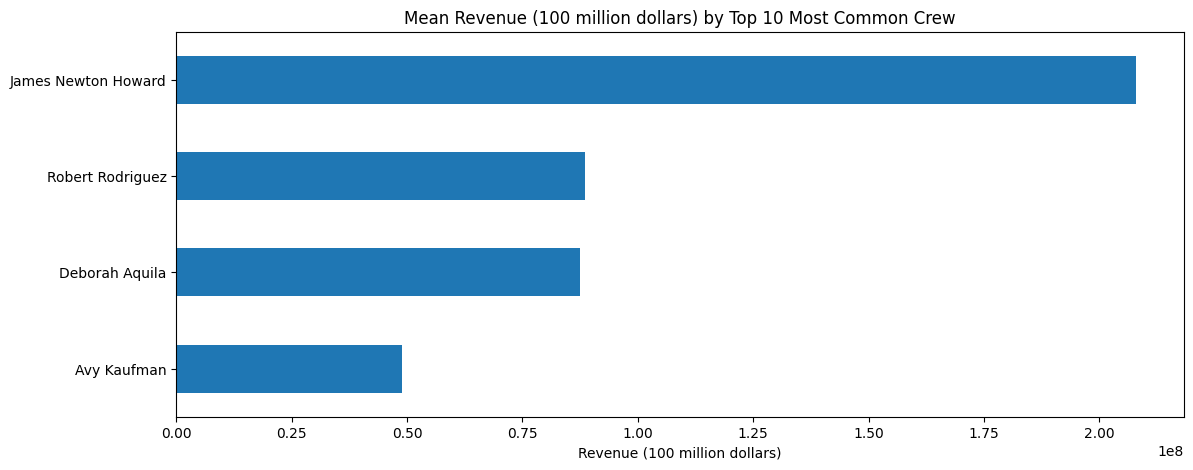

In [ ]:
crew_name_Avy_Kaufman = df.loc[df['crew_name_Avy Kaufman'] == 1, ]
crew_name_Robert_Rodriguez = df.loc[df['crew_name_Robert Rodriguez'] == 1, ]
crew_name_Deborah_Aquila = df.loc[df['crew_name_Deborah Aquila'] == 1, ]
crew_name_James_Newton_Howard = df.loc[df['crew_name_James Newton Howard'] == 1, ]

crew_name_Avy_Kaufman_revenue = crew_name_Avy_Kaufman.mean()['revenue']
crew_name_Robert_Rodriguez_revenue = crew_name_Robert_Rodriguez.mean()[
    'revenue']
crew_name_Deborah_Aquila_revenue = crew_name_Deborah_Aquila.mean()['revenue']
crew_name_James_Newton_Howard_revenue = crew_name_James_Newton_Howard.mean()[
    'revenue']


crew_revenue_concat = pd.Series([crew_name_Avy_Kaufman_revenue,
                                 crew_name_Robert_Rodriguez_revenue,
                                 crew_name_Deborah_Aquila_revenue,
                                 crew_name_James_Newton_Howard_revenue])
crew_revenue_concat.index = ['Avy Kaufman',
                             'Robert Rodriguez',
                             'Deborah Aquila',
                             'James Newton Howard']


fig = plt.figure(figsize=(13, 5))
crew_revenue_concat.sort_values(ascending=True).plot(
    kind='barh', title='Mean Revenue (100 million dollars) by Top 10 Most Common Crew')
plt.xlabel('Revenue (100 million dollars)')

从上面的显示结果可以看到，电影票房最高的制作人员是詹姆斯·纽顿·霍华德（James Newton Howard），其是一名音乐家，主要负责电影的配乐。

**特征工程**

因为票房数据并不平衡，所以要用对数变换来处理倾斜的数据。

Text(0.5, 0, 'Log Revenue')

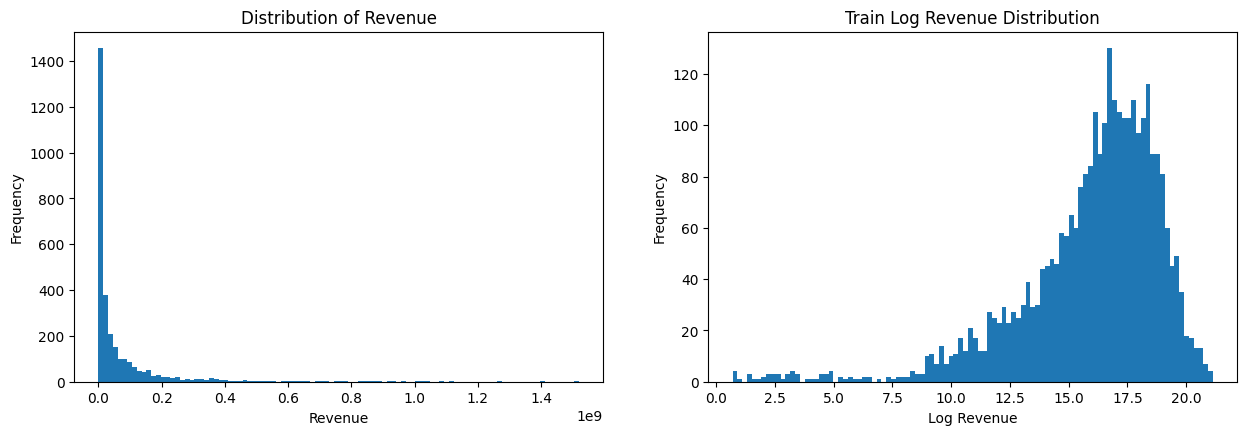

In [ ]:
fig = plt.figure(figsize=(15, 10))

plt.subplot(221)
df['revenue'].plot(kind='hist', bins=100)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')

plt.subplot(222)
np.log1p(df['revenue']).plot(kind='hist', bins=100)
plt.title('Train Log Revenue Distribution')
plt.xlabel('Log Revenue')

对预计票房列也做同样的变换。

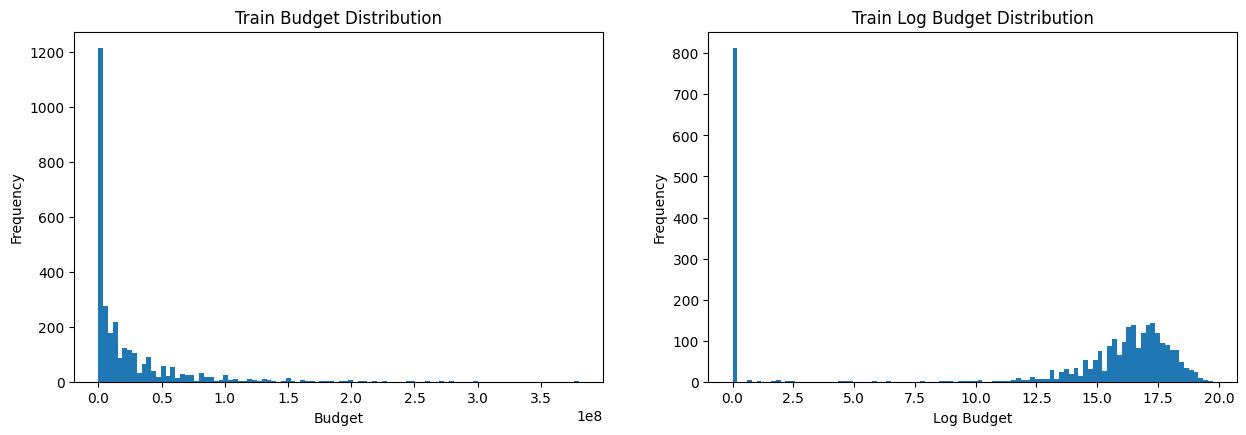

In [ ]:
fig = plt.figure(figsize=(15, 10))

plt.subplot(221)
df['budget'].plot(kind='hist', bins=100)
plt.title('Train Budget Distribution')
plt.xlabel('Budget')

plt.subplot(222)
np.log1p(df['budget']).plot(kind='hist', bins=100)
plt.title('Train Log Budget Distribution')
plt.xlabel('Log Budget')
plt.show()

前面我们主要提取了时间、演员、导演等特征，而数据集还存在电影标题、电影编号等特征，这些特征对预测结果可能没有多大影响，因此，现在删除掉这些特征，仅保留前面我们所提取的特征列。

In [ ]:
drop_columns = ['homepage', 'imdb_id', 'poster_path', 'status',
                'title', 'release_date', 'tagline', 'overview',
                'original_title', 'all_genres', 'all_cast',
                'original_language', 'collection_name', 'all_crew',
                'belongs_to_collection', 'genres', 'production_companies',
                'all_production_companies', 'production_countries',
                'all_countries', 'spoken_languages', 'all_languages',
                'Keywords', 'all_Keywords', 'cast', 'crew']

df_drop = df.drop(drop_columns, axis=1).dropna(axis=1, how='any')

查看最终的数据。

In [ ]:
df_drop.head()

id    budget  popularity   revenue  release_year  release_month  \
0   1  14000000    6.575393  12314651          2015              2   
1   2  40000000    8.248895  95149435          2004              8   
2   3   3300000   64.299990  13092000          2014             10   
3   4   1200000    3.174936  16000000          2012              3   
4   5         0    1.148070   3923970          2009              2   

   release_day  release_quarter  has_collection  num_genres  ...  \
0           20                1               1           1  ...   
1            6                3               1           4  ...   
2           10                4               0           1  ...   
3            9                1               0           2  ...   
4            5                1               0           2  ...   

   crew_name_Billy Hopkins  crew_name_Danny Elfman  crew_name_Mindy Marin  \
0                        0                       0                      0   
1                        0                       0                      0   
2                        0                       0                      0   
3                        0                       0                      0   
4                        0                       0                      0   

   crew_name_Hans Bjerno  crew_name_Sarah Finn  crew_name_Neal H. Moritz  \
0                      0                     0                         0   
1                      0                     0                         0   
2                      0                     0                         0   
3                      0                     0                         0   
4                      0                     0                         0   

   crew_name_Tim Bevan  crew_name_Alan Silvestri  crew_name_Mark Isham  \
0                    0                         0                     0   
1                    0                         0                     0   
2                    0                         0                     0   
3                    0                         0                     0   
4                    0                         0                     0   

   crew_name_Marco Beltrami  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  

[5 rows x 224 columns]

保存文件。

In [ ]:
df_drop.to_csv("./data.csv", index=False, encoding="utf-8-sig")
#保存文件
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
# Create & upload a text file.
#你想要导出的文件的名字
uploaded = drive.CreateFile({'title': 'data.csv'})
#改为之前生成文件的名字
uploaded.SetContentFile('data.csv')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1sJIJ0ZG-ssCDuB6cr9zF_sV0oDytyLFQ


划分训练集和测试集（探索性）。

In [ ]:
from sklearn.model_selection import train_test_split

data_X = df_drop.drop(['id', 'revenue'], axis=1)
data_y = np.log1p(df_drop['revenue'])
train_X, test_X, train_y, test_y = train_test_split(
    data_X, data_y.values, test_size=0.2)

构建预测模型，并进行训练和预测。这里使用线性回归的改进版模型Lasso。

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
model = Lasso()
model.fit(train_X, train_y)  # 构建模型
y_pred = model.predict(test_X)  # 训练模型
mean_squared_error(y_pred, test_y)  # 预测模型

6.617355175327331

Lasso回归的预测结果与真实值的均方差为6到7左右。同样的方法，使用岭回归（Ridge）重新构建模型。

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
model = Ridge()
model.fit(train_X, train_y)
y_pred = model.predict(test_X)
mean_squared_error(y_pred, test_y)

5.502676627511626

从上面的结果可知，Ridge回归要相比Lasso回归要好一点。

**总结**

我们在此notebook中展示了项目的探索性数据分析、数据清洗、缺失值补全等工作。在此过程中，我们将原始数据集中的train.csv作为主要处理对象，并将其变换为data.csv。在项目之后的流程中，我们将使用data.csv作为分析的对象。注意，需要将生成的data.csv从Google Drive中下载至本地。